# Lesson 8 - TimeSeries Simulation 
Version: Jun-2019

## Author - Robert Lisy

## Instructions

Using the California dairy production dataset, perform time series analysis on the data for one of Cottage Cheese Production, Milk Production, or Ice Cream Production (your choice) to answer the following questions:

1. Is this time series stationary?
2. Is there a significant seasonal component?
3. For the residual from the STL decomposition of the time series, what is the order of the ARMA(p,q) process that best fits?

Then forecast production for 12 months and report both numeric values and plot the confidence intervals.

1. Are the confidence intervals reasonably small compared to the forecast means?
2. How do the confidence intervals behave as time moves to the future?


### Note
Please clearly outline the results with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [1]:
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/CADairyProduction.csv"

In [2]:
# Load necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.graphics.tsaplots as splt
import statsmodels.api as statsmodels
import statsmodels.formula.api as sm
import statsmodels.tsa.seasonal as sts
from pmdarima import auto_arima

# used to check if the time series is stationary.
from statsmodels.tsa.stattools import adfuller
matplotlib.rcParams['figure.figsize'] = [15, 5]

df = pd.read_csv(fileName)

# ACF / PACF plot
def plot_acf_pacf(x, lags = 40):
    x = x[x.notna()] # remove NAs
    fig, axes = plt.subplots(1, 2, figsize = (15, 5))
    fig = splt.plot_acf(x, lags = lags, ax = axes[0])
    fig = splt.plot_pacf(x, lags = lags, ax = axes[1]);
    return None

# Residuals plot
def plot_ts_resid(x):
    x = x[x.notna()] # remove NAs
    fig, axes = plt.subplots(1, 2, figsize = (15, 5))
    fig = sns.lineplot(x.index, x, ax = axes[0])
    fig = sns.distplot(x, ax = axes[1]);
    return None

# easy to change...
analysis_col = 'Icecream.Prod'

In [3]:
# add a combined column for year and month...
df['yyyy_mm'] = df['Year'].astype(str) + '_' + df['Month.Count'].astype(str)
df.head()

,Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed,yyyy_mm
0,1995,Jan,4.370,51.595,2.112,0.9803,1,1,1,1995_1
1,1995,Feb,3.695,56.086,1.932,0.8924,2,4,8,1995_2
2,1995,Mar,4.538,68.453,2.162,0.8924,3,9,27,1995_3
3,1995,Apr,4.280,65.722,2.130,0.8967,4,16,64,1995_4
4,1995,May,4.470,73.730,2.227,0.8967,5,25,125,1995_5


In [4]:
# find the range of the data set...
print(f"Min year: {df['Year'].min()}")
print(f"Max year: {df['Year'].max()}")
df_2013 = df[df['Year'] == 2013]
df_2013.head(12)

Min year: 1995
Max year: 2013


,Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed,yyyy_mm
216,2013,Jan,2.282,62.612,3.462,1.7744,217,47089,10218313,2013_217
217,2013,Feb,1.941,66.274,3.231,1.6224,218,47524,10360232,2013_218
218,2013,Mar,2.150,75.770,3.676,1.6968,219,47961,10503459,2013_219
219,2013,Apr,2.217,76.396,3.622,1.7444,220,48400,10648000,2013_220
220,2013,May,2.341,80.899,3.720,1.8552,221,48841,10793861,2013_221
221,2013,Jun,2.694,92.091,3.489,1.8314,222,49284,10941048,2013_222
222,2013,Jul,2.433,84.026,3.373,1.6923,223,49729,11089567,2013_223
223,2013,Aug,2.169,78.382,3.400,1.6273,224,50176,11239424,2013_224
224,2013,Sep,2.193,74.871,3.197,1.5519,225,50625,11390625,2013_225
225,2013,Oct,2.284,70.011,3.338,1.5566,226,51076,11543176,2013_226


In [5]:
# make a time series object
s = '1-1-1995'
e = '12-31-2013'
ts = df[analysis_col]
ts.index = pd.date_range(start = s , end = e, freq = 'M')
ts.head(5)

1995-01-31    51.595
1995-02-28    56.086
1995-03-31    68.453
1995-04-30    65.722
1995-05-31    73.730
Freq: M, Name: Icecream.Prod, dtype: float64

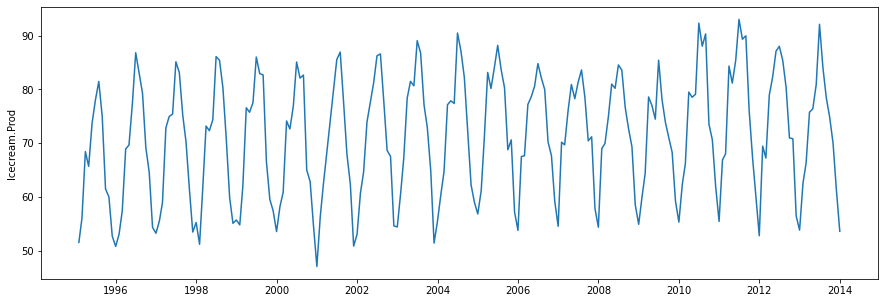

In [6]:
# first lets plot the series...
sns.lineplot(x = ts.index, y = ts);

In [7]:
# Try and decompose the time series..
def decomp_ts(ts, freq = 'M', model = 'additive'):
    res = sts.seasonal_decompose(ts, model = model) #, freq = freq)
    return(pd.DataFrame({'ts': ts, 'trend': res.trend, 'seasonal': res.seasonal, 'resid': res.resid}, 
                        index = ts.index))

decomp = decomp_ts(ts)
decomp.head()

,ts,trend,seasonal,resid
1995-01-31,51.595,NaN,-10.272597,NaN
1995-02-28,56.086,NaN,-6.441930,NaN
1995-03-31,68.453,NaN,4.732371,NaN
1995-04-30,65.722,NaN,5.813755,NaN
1995-05-31,73.730,NaN,7.914674,NaN


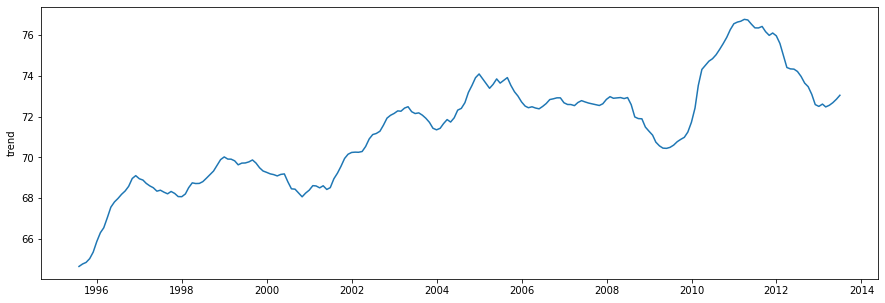

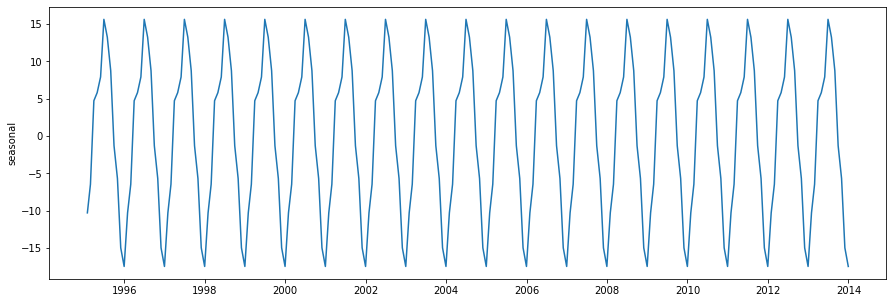

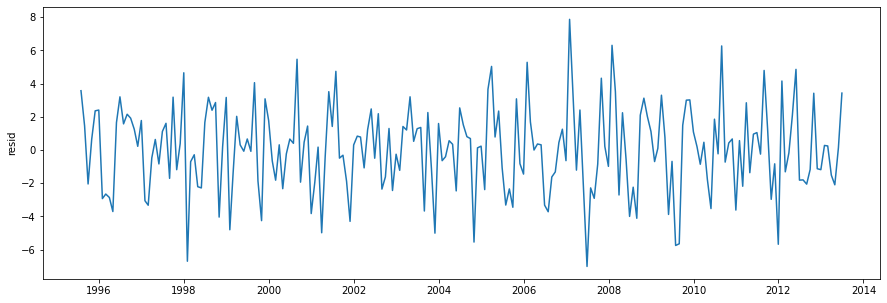

In [8]:
# Plot the components of the decomposition
plot_cols = ['trend', 'seasonal', 'resid']

for c in plot_cols:
    sns.lineplot(x = decomp.index, y = decomp[c])
    plt.show();

In [9]:
# is the data stationary?

# ye ole Dicky Fuller test
def DF_Test(ts):
    ts = ts[ts.notna()]
    stationary = adfuller(ts)
    print('D-F statistic = ' + str(stationary[0]))
    print('p-value = ' + str(stationary[1]))
    print('number of lags used = ' + str(stationary[2]))
    print('Critical value at 5% confidence = ' + str(stationary[4]['5%']))
    print('Critical value at 10% confidence = ' + str(stationary[4]['10%']))
    return None


DF_Test(ts)

D-F statistic = -2.509153936192523
p-value = 0.11326293037432805
number of lags used = 14
Critical value at 5% confidence = -2.875206950587861
Critical value at 10% confidence = -2.5740544497344002


# Stationary

This is a hard one... the data is probably not stationary, since Dicky Fuller rejects it at 95% confidence. However it's marginal since it accepts it at 90%. I'd vote a NO though, given the high seasonal component.

## Seasonality

Yes, there appears to be yearly seasonality in this data... people buy more ice cream in the summer! Check that seasonal graph!

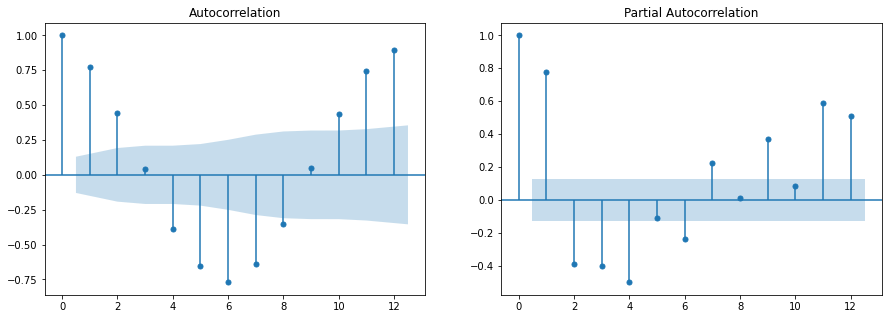

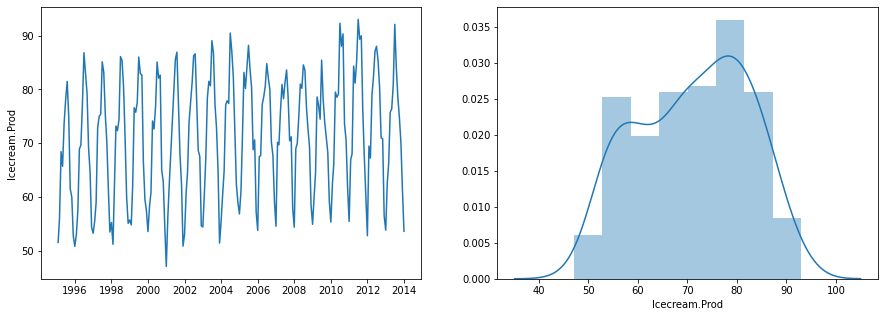

In [10]:
# Now we will use the ACF, PACF, and residuals to deterimine the ARIMA (p,d,q) order
plot_acf_pacf(ts, lags = 12)
plot_ts_resid(ts)

## ACF / PACF intrepretation

Bah, humbug. I'm doing auto ARIMA which will tell me which (p, d, q) order fits this model the best. This is chosen by the lowest BIC

In [11]:
best_fit = auto_arima(ts, 
                      max_p = 3, max_d = 1, max_q = 3, 
                      m = 12, max_P = 1, max_D = 1, max_Q = 1, 
                      information_criterion = 'bic', 
                      trace = True, error_action = 'ignore', suppress_warnings = True)

Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.81 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=1755.939, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=inf, Time=0.29 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=1433.094, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=2603.155, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=1577.961, Time=0.04 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : BIC=1244.107, Time=0.55 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : BIC=1248.171, Time=0.39 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=1267.862, Time=0.48 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : BIC=inf, Time=0.62 sec
 ARIMA(0,0,2)(1,0,1)[12] intercept   : BIC=1248.623, Time=0.82 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=1227.526, Time=0.58 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=1408.183, Time=0.42 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=1546.258, Time=0.07 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept

## The best model is the ARIMA(1,0,0)

Then forecast production for 12 months and report both numeric values and plot the confidence intervals.

Are the confidence intervals reasonably small compared to the forecast means?
How do the confidence intervals behave as time moves to the future?

In [12]:
future_forecast, conf_int = best_fit.predict(n_periods=12, return_conf_int=True)
future_index = pd.date_range(start = '1-1-2014', end = '12-31-2014', freq = 'M')

future_forecast = pd.DataFrame(future_forecast, index = future_index, columns=['fcst'])

# append the confidence interval
conf_df = pd.DataFrame(conf_int, index = future_index, columns=['5%', '95%'])
future_forecast = pd.concat([future_forecast, conf_df], axis=1, sort=False)

future_forecast.head()

,fcst,5%,95%
2014-01-31,64.801886,58.565141,71.038630
2014-02-28,66.777640,60.131223,73.424056
2014-03-31,77.583481,70.883407,84.283555
2014-04-30,78.322084,71.614762,85.029406
2014-05-31,81.939228,75.230923,88.647533


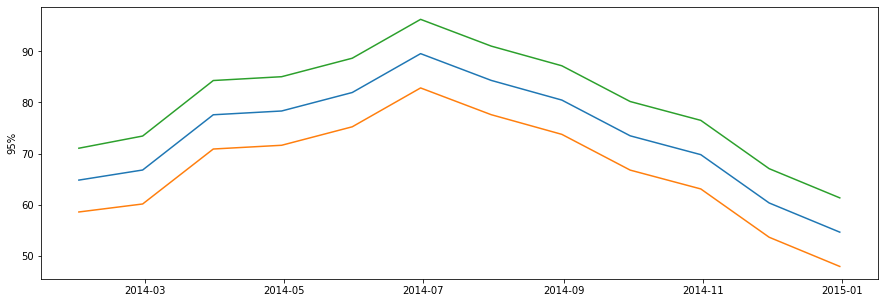

In [13]:
# plot the future forecast and the existing data
plot_cols = ['fcst', '5%', '95%']

for c in plot_cols:
    sns.lineplot(x = future_forecast.index, y = future_forecast[c])
    
plt.show()

## Are the confidence intervals reasonably small compared to the forecast means? 

Sort of... I guess this depends on your tolerance for risk. The CIs stay around ~10% of the predicted value for ice cream. For example in Jan 2014 it's predicted there will be 64.8 units, with the CI between 58.5 and 71 (aka +/- approx. 6 units).

## How do the confidence intervals behave as time moves to the future?

They're stationary, which is weird. I'd expect them to widen out over time given that the future is more uncertain the further out you go. Still, ice cream consumption is a pretty well known event and it's probably a very stable set of data.